The dataset is stored in the fandango_score_comparison.csv file. It contains information on how major movie review services rated movies. The data originally came from FiveThirtyEight.
Each row represents a single movie. Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- User scores, which aggregate user reviews, and Critic score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:

* RottenTomatoes - 0-100, in increments of 1.
* Metacritic - 0-100, in increments of 1.
* IMDB - 0-10, in increments of .1.
* Fandango - 0-5, in increments of .5.

Typically, the primary score shown by the sites will be the Critic score. Here are descriptions of some of the relevant columns in the dataset:

* FILM -- the name of the movie.
* RottenTomatoes -- the RottenTomatoes (RT) critic score.
* RottenTomatoes_User -- the RT user score.
* Metacritic -- the Metacritic critic score.
* Metacritic_User -- the Metacritic user score.
* IMDB -- the IMDB score given to the movie.
* Fandango_Stars -- the number of stars Fandango gave the movie.

To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings. Any column with the suffix _norm is the corresponding column changed to a 0-5 scale. For example, RT_norm takes the RottenTomatoes column and turns it into a 0-5 scale from a 0-100 scale. Any column with the suffix _round is the rounded version of another column. For example, RT_user_norm_round rounds the RT_user_norm column to the nearest .5.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

movies=pd.read_csv('fandango_score_comparison.csv')
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


We'll primarily focus on the 'Metacritic_norm_round' and the 'Fandango_Stars' columns, which will let you see how Fandango and Metacritic differ in terms of review scores.

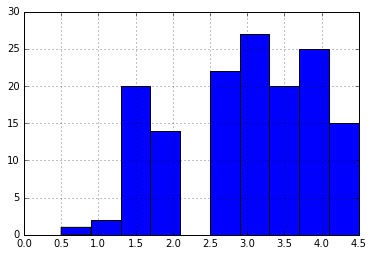

In [5]:
movies["Metacritic_norm_round"].hist()

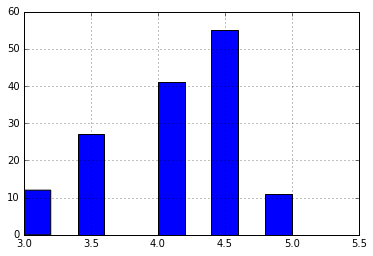

In [6]:
movies["Fandango_Stars"].hist()

Interestingly, Fandango ratings are more discrete than Metacritic. Let's compare their descriptive statistics.

In [11]:
mean_metacritic=movies["Metacritic_norm_round"].mean()
mean_fandango=movies["Fandango_Stars"].mean()
std_metacritic=movies["Metacritic_norm_round"].std()
std_fandango=movies["Fandango_Stars"].std()
median_metacritic=movies["Metacritic_norm_round"].median()
median_fandango=movies["Fandango_Stars"].median()
print ('mean_metacritic:', mean_metacritic)
print('mean_fandango:',mean_fandango)
print('std_metacritic:',std_metacritic)
print('std_fandango:',std_fandango)
print('median_metacritic:',median_metacritic)
print('median_fandango:',median_fandango)

mean_metacritic: 2.97260273973
mean_fandango: 4.08904109589
std_metacritic: 0.990960561374
std_fandango: 0.540385977979
median_metacritic: 3.0
median_fandango: 4.0


Fandango has substaintially higher mean ratings compared to metacritic, with a lower strandard deviation. In both ratings, mean and median seem to be close.

Background research: Metacritic seems to be clear and transparent about their rating methodology. They publish individual ratings online. This does not apply to Fandango.

##### Now that we know there are differences, we'd like to know which movies tend to be the largest outliers. We can accomplish this using scatterplots.

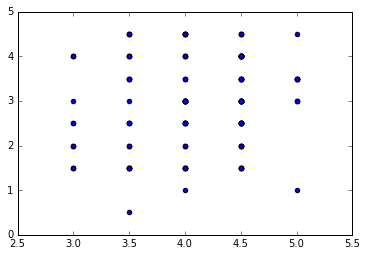

In [12]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])

Seems like several movies have high ratings in one and low ratings in other rating system. Let's look at the differences in these rating systems for each individual movie.

In [15]:
movies["fm_diff"]=abs(movies["Fandango_Stars"]-movies["Metacritic_norm_round"])
movies.sort_values(by='fm_diff',ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


### Fandango and Metacritic correlation¶

Let's see what the correlation coefficient between Fandango_Stars and Metacritic_norm_round is. This will help you determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings.

In [19]:
from scipy.stats import pearsonr
#here we calculate the Pearson's r value. It's a measure of the linear correlation between two variables X and Y.
r_value, p_value=pearsonr(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
r_value

0.17844919073895918

### Linear regression
mmm...interesting! faily low correlation. let's fit a linear regression with metacritic ratings as predictor and fandango as response. We then can look at the the residual plots.

In [28]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
print('p_value: ', p_value)

p_value:  0.0311615162285


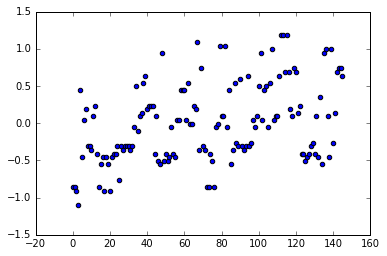

In [27]:
predicted_y=slope*movies["Metacritic_norm_round"]+intercept
residual=predicted_y-movies["Fandango_Stars"]
plt.scatter(residual.index,residual)
    